# Lab 1 使用 Pandas

(1) 計算每隻股票過去一年中日變化率超過 9% 的次數。  
(2) 按發生的次數排名這些資產。  
(3) 將排名的結果存檔為 csv 文件。  
(4) 繪製前 3 名贏家和前 3 名輸家的時間序列圖；通過使用 rebase() 對每個時間序列進行標準化來比較這些資產的相對表現 (即算出損益)。  
(5) 製作散佈圖，觀察損益和發生次數 (即日變化率超過的次數) 之間是否存在某些關係。  
(6) 將散佈圖另存為 pdf 文件。

## 引入函式庫

In [22]:
import datetime

import ffn
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## Task 1

In [23]:
tickers = ['2412.TW', '2330.TW', '2317.TW', '2886.TW', '2892.TW', '5880.TW', '2801.TW', '2880.TW', '2834.TW']

data = ffn.get(tickers, start=datetime.datetime.now() - datetime.timedelta(days=365)).sort_index()
data

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,2412tw,2330tw,2317tw,2886tw,2892tw,5880tw,2801tw,2880tw,2834tw
Date,,,,,,,,,
2024-06-11,121.704086,876.233765,175.987503,36.643089,26.153831,24.246429,16.999193,23.754215,15.145793
2024-06-12,121.704086,902.034485,182.812500,36.689827,26.059753,24.199348,16.999193,23.706896,15.190078
2024-06-13,121.704086,915.482605,187.200012,36.876781,26.153831,24.246429,16.999193,23.896173,15.190078
2024-06-14,123.147217,918.471130,193.050003,36.970261,26.294949,24.434750,17.046152,24.180088,15.190078
2024-06-17,122.666176,917.474976,195.000000,37.203953,26.294949,24.481831,17.093111,24.274725,15.278651
...,...,...,...,...,...,...,...,...,...
2025-06-03,130.000000,950.000000,151.500000,39.400002,26.650000,23.900000,18.350000,26.200001,14.800000
2025-06-04,129.500000,990.000000,156.000000,39.849998,26.799999,24.250000,18.400000,26.600000,14.900000
2025-06-05,130.000000,998.000000,155.500000,39.700001,27.200001,24.049999,18.400000,26.350000,14.900000


In [24]:
dicts = {}
for stock in data.columns:
    x = data[stock].pct_change()
    dicts[stock] = np.sum((x > 0.09) | (x < -0.09))

dicts


{'2412tw': 0,
 '2330tw': 3,
 '2317tw': 5,
 '2886tw': 1,
 '2892tw': 1,
 '5880tw': 1,
 '2801tw': 1,
 '2880tw': 1,
 '2834tw': 2}

## Task 2

In [25]:
task2_df = pd.DataFrame(data={'Tickers': dicts.keys(), 'Count': dicts.values()}).sort_values(by='Count',
                                                                                             ascending=False)
task2_df

,Tickers,Count
2,2317tw,5
1,2330tw,3
8,2834tw,2
3,2886tw,1
4,2892tw,1
5,5880tw,1
6,2801tw,1
7,2880tw,1
0,2412tw,0


## Task 3

In [26]:
task2_df.to_csv('task2.csv', index=False)

## Task 4

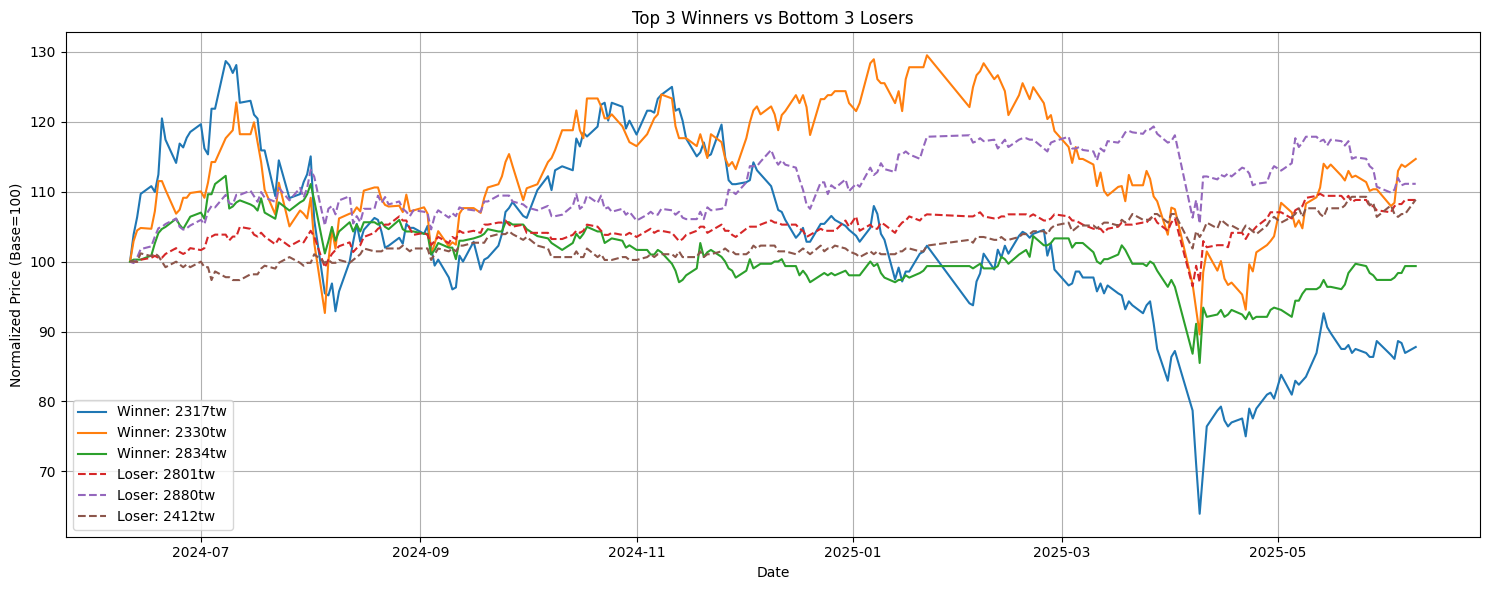

In [27]:
top3_winners = task2_df['Tickers'].head(3).tolist()
top3_losers = task2_df['Tickers'].tail(3).tolist()

selected_stocks = top3_winners + top3_losers

selected_data = data[selected_stocks]
normalized_data = selected_data.rebase()

plt.figure(figsize=(15, 6))

# 分別繪製每條線並給予標籤
for column in normalized_data.columns:
    if column in top3_winners:
        plt.plot(normalized_data[column], label=f'Winner: {column}', linestyle='-')
    else:
        plt.plot(normalized_data[column], label=f'Loser: {column}', linestyle='--')

plt.title('Top 3 Winners vs Bottom 3 Losers')
plt.xlabel('Date')
plt.ylabel('Normalized Price (Base=100)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


## Task 5

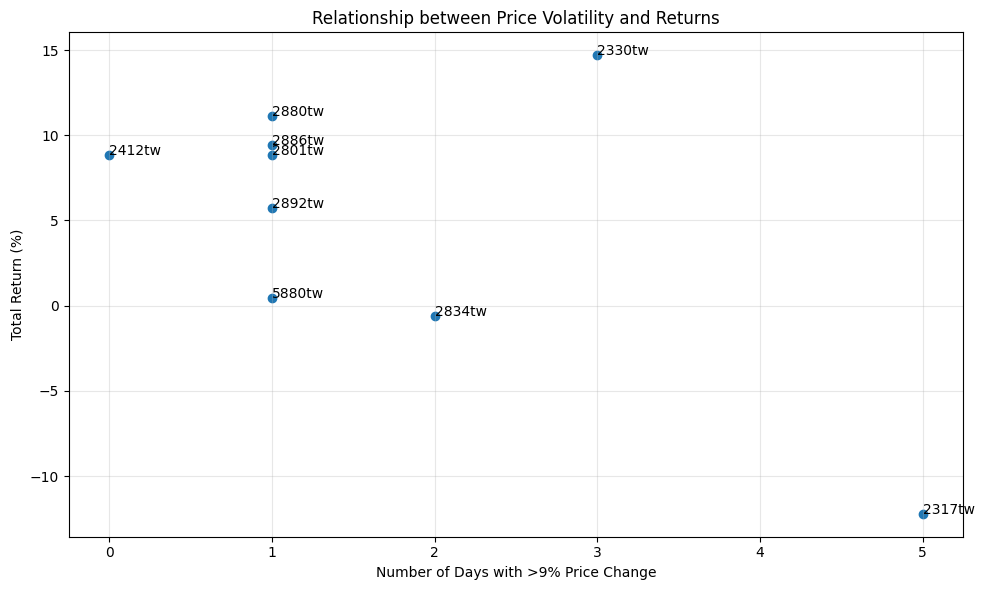

In [36]:
returns = {}
for ticker in data.columns:
    # 計算總損益百分比
    initial_price = data[ticker].iloc[0]
    final_price = data[ticker].iloc[-1]
    returns[ticker] = (final_price / initial_price - 1) * 100  # 轉換為百分比

scatter_df = pd.DataFrame({
    'Ticker': data.columns,
    'Count': [dicts[ticker] for ticker in data.columns],
    'Return': [returns[ticker] for ticker in data.columns]
})

# 繪製散佈圖
fig = plt.figure(figsize=(10, 6))
plt.scatter(scatter_df['Count'], scatter_df['Return'])

# 添加股票代碼標籤
for i, txt in enumerate(scatter_df['Ticker']):
    plt.annotate(txt, (scatter_df['Count'].iloc[i], scatter_df['Return'].iloc[i]))

# 設置圖表樣式
plt.title('Relationship between Price Volatility and Returns')
plt.xlabel('Number of Days with >9% Price Change')
plt.ylabel('Total Return (%)')
plt.grid(True, alpha=0.3)

# 顯示圖表
plt.tight_layout()
plt.show()

## Task 6

In [37]:
fig.savefig("output.pdf")